### IMPORTING LIBRARIES 

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
pd. set_option('display.max_columns', 25) # or 1000.

### DATA PREPROCESSING

In [78]:
#Importing dataset
data = pd.read_csv('H2HBABBA2262.csv')

In [79]:
#Filtering columns on the basis of null values or completely unique values
data.nunique()

business_code                 6
cust_number                1421
name_customer              4170
clear_date                  395
buisness_year                 2
doc_id                    48814
posting_date                504
document_create_date        510
document_create_date.1      505
due_in_date                 544
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44235
baseline_create_date        508
cust_payment_terms           78
invoice_id                48807
isOpen                        2
dtype: int64

#### Observations


     1) posting_id has only 1 value  i.e Constant column

     2) area business has all 0/null values  i.e Null column                 
     
     3) invoice_id has all unique values except 7  i.e Unique column
     
     4) doc_id has all unique values  i.e unique column
     
     5)isOpen has 2 uniques values i.e it only tells about clear date. whether clear date is there or not
     
     6)Document_type has 2 unique values 

In [80]:
#checking count of all the rows with null values 
data.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    7
isOpen                        0
dtype: int64

In [81]:
#dropping all the duplicate rows as they are of no use
data = data.drop_duplicates(keep='first')

### Null Imputation

In [82]:
#checking all the null values of Invoice_id
data[data.invoice_id.isnull()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
7980,CA02,0140104409,LOB co,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190228,20190310.0,CAD,X2,1.0,NaN,173.44,20190228.0,CA10,NaN,0
10817,CA02,0100054349,PURITY L foundation,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190311,20190321.0,CAD,X2,1.0,NaN,3590.82,20190311.0,CA10,NaN,0
31586,CA02,0140106054,TREE trust,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190307,20190317.0,CAD,X2,1.0,NaN,1751.14,20190307.0,CA10,NaN,0
34121,CA02,0140106054,TREE trust,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190228,20190310.0,CAD,X2,1.0,NaN,216.80,20190228.0,CA10,NaN,0
37386,CA02,0140104409,LOB us,2019-04-17 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190319,20190329.0,CAD,X2,1.0,NaN,371.40,20190319.0,CA10,NaN,0
38067,CA02,0140106054,TREE associates,2019-05-09 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190213,20190223.0,CAD,X2,1.0,NaN,216.80,20190213.0,CA10,NaN,0
42036,CA02,0140104409,LOB systems,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20181228,20190107.0,CAD,X2,1.0,NaN,539.64,20181228.0,CA10,NaN,0


In [83]:
#checking all rows with document_type as X2 for futher observation
data[data['document type'].isin(['X2'])]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
7980,CA02,0140104409,LOB co,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190228,20190310.0,CAD,X2,1.0,NaN,173.44,20190228.0,CA10,NaN,0
10817,CA02,0100054349,PURITY L foundation,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190311,20190321.0,CAD,X2,1.0,NaN,3590.82,20190311.0,CA10,NaN,0
31586,CA02,0140106054,TREE trust,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190307,20190317.0,CAD,X2,1.0,NaN,1751.14,20190307.0,CA10,NaN,0
34121,CA02,0140106054,TREE trust,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190228,20190310.0,CAD,X2,1.0,NaN,216.80,20190228.0,CA10,NaN,0
37386,CA02,0140104409,LOB us,2019-04-17 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190319,20190329.0,CAD,X2,1.0,NaN,371.40,20190319.0,CA10,NaN,0
38067,CA02,0140106054,TREE associates,2019-05-09 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190213,20190223.0,CAD,X2,1.0,NaN,216.80,20190213.0,CA10,NaN,0
42036,CA02,0140104409,LOB systems,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20181228,20190107.0,CAD,X2,1.0,NaN,539.64,20181228.0,CA10,NaN,0


#### Observation

1) Document type is X2 only for those rows which has null invoice ID

2) Invoice Id is missing which may be a human error, as the payment has been done by the customer. So we will keep these rows as    important information is not missing

In [84]:
#dropping all the columns that don't contribute much in prediction and dont give information and no pattern can be seen in them
data = data.drop(columns=['posting_id','area_business','doc_id','isOpen','document type'])

In [85]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,U001,0200726979,BJ'S us,2019-04-11 00:00:00,2019.0,2019-03-27,20190326,20190327,20190411.0,USD,140.37,20190327.0,NAA8,1.929035e+09
1,U001,0200416837,DEC systems,2019-02-13 00:00:00,2019.0,2019-02-08,20190208,20190208,20190208.0,USD,25611.92,20190201.0,NAM1,1.928765e+09
2,U001,0200980828,BEN E systems,NaN,2020.0,2020-03-19,20200314,20200319,20200420.0,USD,7917.72,20200319.0,NA32,1.930652e+09
3,U001,0200744019,TARG corp,2019-12-06 00:00:00,2019.0,2019-11-19,20191119,20191119,20191204.0,USD,5282.73,20191119.0,NAA8,1.930169e+09
4,U001,0200704858,WAKE associates,2019-04-05 00:00:00,2019.0,2019-03-21,20190320,20190321,20190405.0,USD,34691.64,20190321.0,NAA8,1.928997e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST foundation,2019-05-29 00:00:00,2019.0,2019-05-06,20190506,20190506,20190521.0,USD,5680.15,20190506.0,NAAX,1.929267e+09
49996,U001,0200769623,WAL-MAR trust,2019-11-05 00:00:00,2019.0,2019-10-16,20191013,20191016,20191031.0,USD,24635.62,20191016.0,NAH4,1.930007e+09
49997,CA02,140104229,A & W F in,2019-07-31 00:00:00,2019.0,2019-07-05,20190705,20190705,20190715.0,CAD,1537.65,20190705.0,CA10,2.960562e+09
49998,U013,CC6000,HEINZ co,2019-10-24 00:00:00,2019.0,2019-06-29,20190629,20190629,20190813.0,USD,21460.85,20190629.0,NAVF,1.991828e+09





    We will drop document_create_date as we will consider document_create_date.1 because it is normalized.                        { Given in the Data Dictionary Tech Track }
    
    Also removing baseline_create_date as it is highly correlated with document_create_date.1 and almost all the values are same

In [86]:
#dropped document create date and baseline create date
data.drop(columns =['document_create_date','baseline_create_date'],inplace=True)

In [87]:
data.shape

(48814, 12)

In [88]:
#removed 1204 duplicated rows 
data.shape

(48814, 12)

In [89]:
#again checking the null values
data.isna().sum()

business_code                0
cust_number                  0
name_customer                0
clear_date                9684
buisness_year                0
posting_date                 0
document_create_date.1       0
due_in_date                  0
invoice_currency             0
total_open_amount            0
cust_payment_terms           0
invoice_id                   7
dtype: int64

In [90]:
#checking the data types of all the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48814 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           48814 non-null  object 
 1   cust_number             48814 non-null  object 
 2   name_customer           48814 non-null  object 
 3   clear_date              39130 non-null  object 
 4   buisness_year           48814 non-null  float64
 5   posting_date            48814 non-null  object 
 6   document_create_date.1  48814 non-null  int64  
 7   due_in_date             48814 non-null  float64
 8   invoice_currency        48814 non-null  object 
 9   total_open_amount       48814 non-null  float64
 10  cust_payment_terms      48814 non-null  object 
 11  invoice_id              48807 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 4.8+ MB


In [91]:
#converting all the dates column in date time format
data['clear_date'] = pd.to_datetime(data['clear_date'], format = '%Y-%m-%d')
data['posting_date'] = pd.to_datetime(data['posting_date'], format = '%Y-%m-%d')
data['document_create_date.1'] = pd.to_datetime(data['document_create_date.1'], format = '%Y%m%d')
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format = '%Y%m%d')

In [92]:
#checking all the updates of the date format
data

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id
0,U001,0200726979,BJ'S us,2019-04-11,2019.0,2019-03-27,2019-03-27,2019-04-11,USD,140.37,NAA8,1.929035e+09
1,U001,0200416837,DEC systems,2019-02-13,2019.0,2019-02-08,2019-02-08,2019-02-08,USD,25611.92,NAM1,1.928765e+09
2,U001,0200980828,BEN E systems,NaT,2020.0,2020-03-19,2020-03-19,2020-04-20,USD,7917.72,NA32,1.930652e+09
3,U001,0200744019,TARG corp,2019-12-06,2019.0,2019-11-19,2019-11-19,2019-12-04,USD,5282.73,NAA8,1.930169e+09
4,U001,0200704858,WAKE associates,2019-04-05,2019.0,2019-03-21,2019-03-21,2019-04-05,USD,34691.64,NAA8,1.928997e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200794332,COST foundation,2019-05-29,2019.0,2019-05-06,2019-05-06,2019-05-21,USD,5680.15,NAAX,1.929267e+09
49996,U001,0200769623,WAL-MAR trust,2019-11-05,2019.0,2019-10-16,2019-10-16,2019-10-31,USD,24635.62,NAH4,1.930007e+09
49997,CA02,140104229,A & W F in,2019-07-31,2019.0,2019-07-05,2019-07-05,2019-07-15,CAD,1537.65,CA10,2.960562e+09
49998,U013,CC6000,HEINZ co,2019-10-24,2019.0,2019-06-29,2019-06-29,2019-08-13,USD,21460.85,NAVF,1.991828e+09


In [93]:
#counting the null value count in
data['clear_date'].isnull().value_counts()

False    39130
True      9684
Name: clear_date, dtype: int64

In [94]:
#
data['business_code'] = np.where(data['business_code'].isin([ "U002",
                                                        "U005",
                                                        "U007"]),"Other codes",data['business_code'])

In [95]:
#Label encoding on business_code to convert it to int type in all 
#Doing it here as it will save alot of effot and time, otherwise we had to do labelling seperately on main_train and main_test

from sklearn.preprocessing import LabelEncoder

bcode_enc = LabelEncoder()
bcode_enc.fit(data['business_code'])
data['bcode_enc'] = bcode_enc.transform(data['business_code'])


cus_name_enc = LabelEncoder()
cus_name_enc.fit(data['name_customer'])
data['cus_name_enc'] = cus_name_enc.transform(data['name_customer'])


term_enc = LabelEncoder()
term_enc.fit(data['cust_payment_terms'])
data['cus_terms_enc'] = term_enc.transform(data['cust_payment_terms'])


In [96]:
#segregating the dataset into main_train and main_test based on the null value of clear_date
#main_train has all the rows with given clear_date value
#main_test has all the rows with null clear_date value


main_train = data[data['clear_date'].isnull()==False]
main_test = data[data['clear_date'].isnull()]

In [97]:
main_train.shape  , main_test.shape

((39130, 15), (9684, 15))

In [98]:
main_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39130 entries, 0 to 49998
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           39130 non-null  object        
 1   cust_number             39130 non-null  object        
 2   name_customer           39130 non-null  object        
 3   clear_date              39130 non-null  datetime64[ns]
 4   buisness_year           39130 non-null  float64       
 5   posting_date            39130 non-null  datetime64[ns]
 6   document_create_date.1  39130 non-null  datetime64[ns]
 7   due_in_date             39130 non-null  datetime64[ns]
 8   invoice_currency        39130 non-null  object        
 9   total_open_amount       39130 non-null  float64       
 10  cust_payment_terms      39130 non-null  object        
 11  invoice_id              39123 non-null  float64       
 12  bcode_enc               39130 non-null  int32 

In [99]:
#sorting values by posting_date as the delay is dependent on the posting date
# we only use past data to train the model , hence sorting ensures that while splittig the data only past data is there on the train set

main_train = main_train.sort_values(by='posting_date')

In [100]:
#Making the target Variable, delay in our case
main_train['Delay'] = (main_train['clear_date'] - main_train['due_in_date']).dt.days

In [101]:
main_train

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,bcode_enc,cus_name_enc,cus_terms_enc,Delay
32549,U001,0200769623,WAL-MAR,2019-01-09,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,1764.66,NAH4,1.928545e+09,2,4042,39,-5
19587,U001,0200769623,WAL-MAR associates,2019-01-10,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,9144.64,NAH4,1.928545e+09,2,4043,39,-4
35932,Other codes,0200816950,COLOM trust,2019-01-30,2019.0,2018-12-30,2018-12-30,2019-01-29,USD,64473.79,NA38,1.990563e+09,1,780,17,1
35938,U001,0200726979,BJ'S trust,2019-01-22,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,13864.45,NAA8,1.928543e+09,2,442,23,8
43766,U001,0200759878,SA co,2019-01-15,2019.0,2018-12-30,2018-12-30,2019-01-14,USD,33315.99,NAH4,1.928537e+09,2,3237,39,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2190,U001,0200794332,COST associates,2020-03-12,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,5218.12,NAAX,1.930574e+09,2,837,25,-1
32302,U001,0200794332,COST foundation,2020-03-12,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,16997.76,NAAX,1.930574e+09,2,841,25,-1
25978,U001,0200794332,COST llc,2020-03-12,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,77997.49,NAAX,1.930577e+09,2,843,25,-1
15097,U001,0200794332,COST in,2020-03-12,2020.0,2020-02-27,2020-02-27,2020-03-13,USD,13720.67,NAAX,1.930577e+09,2,842,25,-1


## DATA SPLITTING

In [102]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e delay
X = main_train.drop('Delay',axis=1)

# y --> contains only the target value 
y = main_train['Delay']

In [103]:
#splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set
from sklearn.model_selection import train_test_split
X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [104]:
#Further splitting the X_inter_test,y_inter_test into X_val,X_test,y_val,y_test 
#doing a 50:50 split i.e 50% data fed to test data set and rest 50% to validation set
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [105]:
X_train.shape , X_val.shape , X_test.shape

((27391, 15), (5869, 15), (5870, 15))

# EDA

<AxesSubplot:xlabel='Delay', ylabel='Density'>

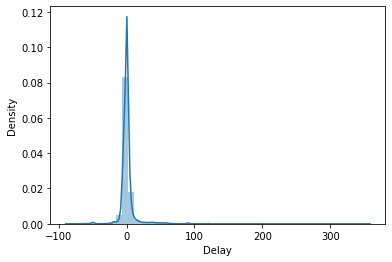

In [106]:
# distribution of the target column i.e. Delay
# right skewed distribution
sns.distplot(y_train)

<AxesSubplot:xlabel='Delay', ylabel='due_in_date'>

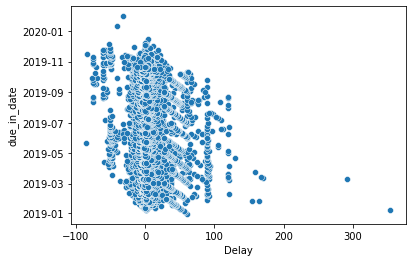

In [107]:
#No direct trend
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Delay", y="due_in_date")


<AxesSubplot:xlabel='Delay', ylabel='total_open_amount'>

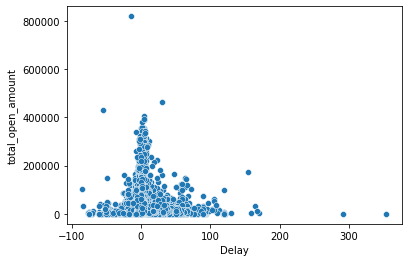

In [108]:
#plotting scatter plot 
sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="Delay", y="total_open_amount")

In [109]:
#checking the different parameters of the X_train
X_train.describe()

,buisness_year,total_open_amount,invoice_id,bcode_enc,cus_name_enc,cus_terms_enc
count,27391.0,27391.000000,2.738400e+04,27391.000000,27391.000000,27391.000000
mean,2019.0,31551.198877,2.010549e+09,1.854368,2522.389873,30.313972
std,0.0,39173.822319,2.759519e+08,0.555305,1395.774593,13.729866
min,2019.0,1.410000,1.928505e+09,0.000000,0.000000,1.000000
25%,2019.0,4507.395000,1.928992e+09,2.000000,1008.000000,23.000000
50%,2019.0,16783.090000,1.929419e+09,2.000000,2870.000000,23.000000
75%,2019.0,45755.020000,1.929765e+09,2.000000,4038.000000,39.000000
max,2019.0,819206.590000,2.960585e+09,3.000000,4169.000000,77.000000


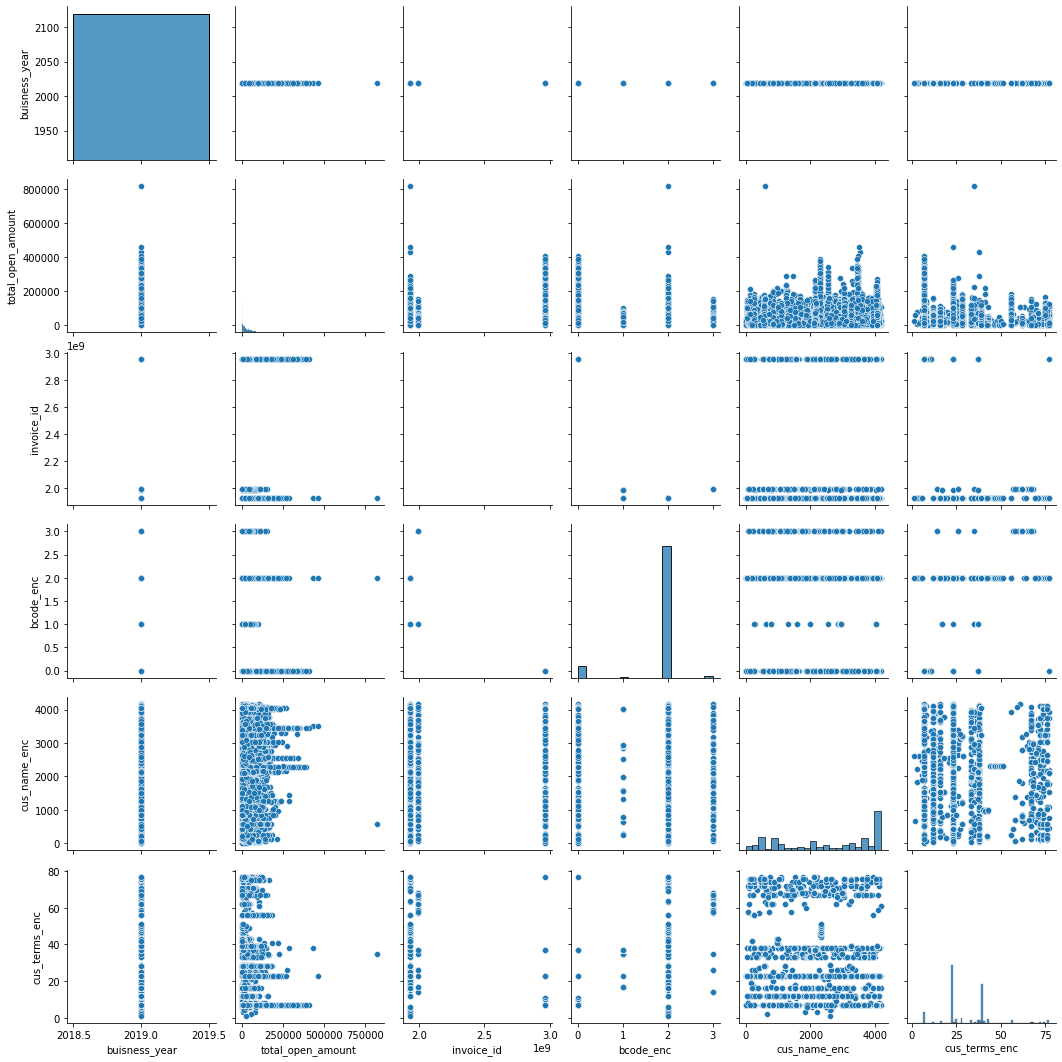

In [110]:
#visual representation of the relation between different columns of our data pairwise
sns.pairplot(X_train)

# Feature Engg

In [111]:
#Checking the data types
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27391 entries, 32549 to 2805
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27391 non-null  object        
 1   cust_number             27391 non-null  object        
 2   name_customer           27391 non-null  object        
 3   clear_date              27391 non-null  datetime64[ns]
 4   buisness_year           27391 non-null  float64       
 5   posting_date            27391 non-null  datetime64[ns]
 6   document_create_date.1  27391 non-null  datetime64[ns]
 7   due_in_date             27391 non-null  datetime64[ns]
 8   invoice_currency        27391 non-null  object        
 9   total_open_amount       27391 non-null  float64       
 10  cust_payment_terms      27391 non-null  object        
 11  invoice_id              27384 non-null  float64       
 12  bcode_enc               27391 non-null  int

In [112]:
# For catagorical columns with relatively low unique value (<= 15) -- looking for value_counts
# if unique count ==1 , constant column 

for col in X_train.columns:
    if X_train[col].nunique()<= 15:
        print(X_train[col].value_counts())
        print('#########################')

U001           24772
CA02            2136
U013             383
Other codes      100
Name: business_code, dtype: int64
#########################
2019.0    27391
Name: buisness_year, dtype: int64
#########################
USD    25255
CAD     2136
Name: invoice_currency, dtype: int64
#########################
2    24772
0     2136
3      383
1      100
Name: bcode_enc, dtype: int64
#########################


In [113]:
#removing business year as it is a constant column
X_train.drop('buisness_year',inplace=True,axis=1)
X_test.drop('buisness_year',inplace=True,axis=1)
X_val.drop('buisness_year',inplace=True,axis=1)

In [114]:
#converting the total amount in one currency in all test,val and train
X_train['amt_same_curr'] = np.where(X_train.invoice_currency=="CAD",X_train.total_open_amount*0.81337,X_train.total_open_amount)
X_test['amt_same_curr'] = np.where(X_test.invoice_currency=="CAD",X_test.total_open_amount*0.81337,X_test.total_open_amount)
X_val['amt_same_curr'] = np.where(X_val.invoice_currency=="CAD",X_val.total_open_amount*0.81337,X_val.total_open_amount)

In [115]:
#we dont need invoice currency and total open amount as we have created a seperate column amt_same_curr using these two.
#removing from test, val and train
X_train.drop(['invoice_currency','total_open_amount'],inplace=True,axis=1)
X_test.drop(['invoice_currency','total_open_amount'],inplace=True,axis=1)
X_val.drop(['invoice_currency','total_open_amount'],inplace=True,axis=1)


In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27391 entries, 32549 to 2805
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27391 non-null  object        
 1   cust_number             27391 non-null  object        
 2   name_customer           27391 non-null  object        
 3   clear_date              27391 non-null  datetime64[ns]
 4   posting_date            27391 non-null  datetime64[ns]
 5   document_create_date.1  27391 non-null  datetime64[ns]
 6   due_in_date             27391 non-null  datetime64[ns]
 7   cust_payment_terms      27391 non-null  object        
 8   invoice_id              27384 non-null  float64       
 9   bcode_enc               27391 non-null  int32         
 10  cus_name_enc            27391 non-null  int32         
 11  cus_terms_enc           27391 non-null  int32         
 12  amt_same_curr           27391 non-null  flo

In [117]:
#Extracting the day, month and weekday from the due_in_date to convert it into int
X_train['due_month'] = X_train['due_in_date'].dt.month
X_train['due_day'] = X_train['due_in_date'].dt.day
X_train['due_weekday'] =X_train['due_in_date'].dt.weekday

X_test['due_month'] = X_test['due_in_date'].dt.month
X_test['due_day'] = X_test['due_in_date'].dt.day
X_test['due_weekday'] =X_test['due_in_date'].dt.weekday

X_val['due_month'] = X_val['due_in_date'].dt.month
X_val['due_day'] = X_val['due_in_date'].dt.day
X_val['due_weekday'] =X_val['due_in_date'].dt.weekday

In [118]:
#Calculating the time given to the customer for making the payment by subtracting posting_date from due_in_date
X_train['time_given'] = (X_train['due_in_date'] - X_train['posting_date']).dt.days
X_test['time_given'] = (X_test['due_in_date'] - X_test['posting_date']).dt.days
X_val['time_given'] = (X_val['due_in_date'] - X_val['posting_date']).dt.days



In [119]:
#Looking for other data type conversion
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27391 entries, 32549 to 2805
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           27391 non-null  object        
 1   cust_number             27391 non-null  object        
 2   name_customer           27391 non-null  object        
 3   clear_date              27391 non-null  datetime64[ns]
 4   posting_date            27391 non-null  datetime64[ns]
 5   document_create_date.1  27391 non-null  datetime64[ns]
 6   due_in_date             27391 non-null  datetime64[ns]
 7   cust_payment_terms      27391 non-null  object        
 8   invoice_id              27384 non-null  float64       
 9   bcode_enc               27391 non-null  int32         
 10  cus_name_enc            27391 non-null  int32         
 11  cus_terms_enc           27391 non-null  int32         
 12  amt_same_curr           27391 non-null  flo

# Feature Selection

In [120]:
#Selecting these particular features and making a list of the same
features = ['bcode_enc','cus_name_enc','cus_terms_enc','amt_same_curr','due_month','due_day','time_given','due_weekday']

In [121]:
#verifying the features
X_train[features]

,bcode_enc,cus_name_enc,cus_terms_enc,amt_same_curr,due_month,due_day,time_given,due_weekday
32549,2,4042,39,1764.66,1,14,15,0
19587,2,4043,39,9144.64,1,14,15,0
35932,1,780,17,64473.79,1,29,30,1
35938,2,442,23,13864.45,1,14,15,0
43766,2,3237,39,33315.99,1,14,15,0
...,...,...,...,...,...,...,...,...
8416,2,3657,23,26884.14,10,22,15,1
10713,2,3578,23,22450.80,10,22,15,1
43699,2,53,23,100228.30,10,22,15,1
49277,2,2585,23,43785.70,10,22,15,1


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

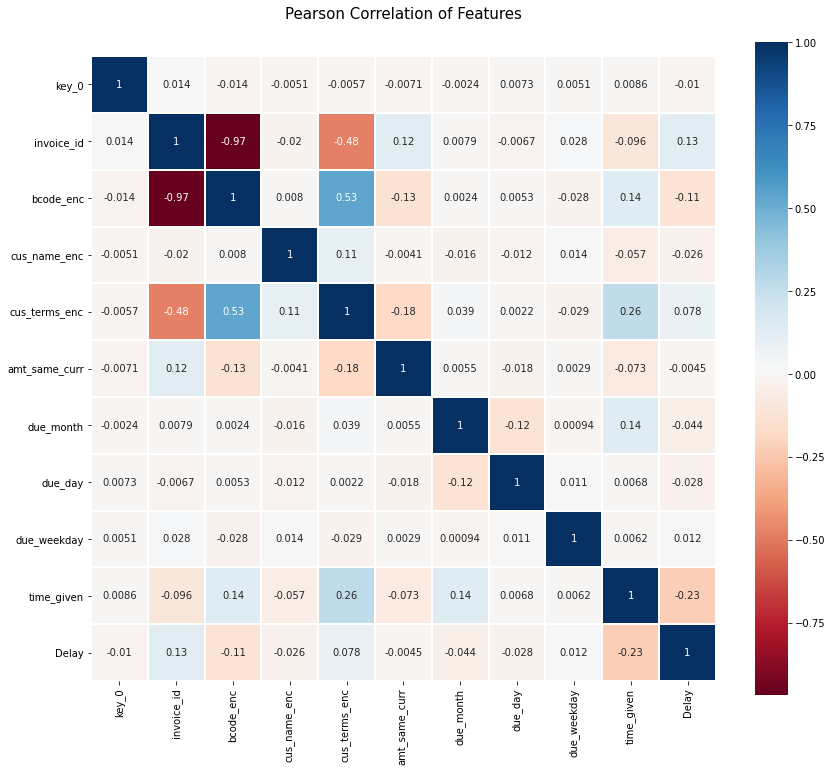

In [122]:
#Plotting a heatmap to check further correlation between target column and other olumns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

# Modelling

In [123]:
#Creating a DecisionTree model for this dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0 , max_depth=10)

In [124]:
#regressor is the name of the model
#Training the model
regressor.fit(X_train[features], y_train)

DecisionTreeRegressor(max_depth=10, random_state=0)

In [125]:
#predicting the delay on test dataset
y_predict2 = regressor.predict(X_test[features])

In [126]:
#Calculating the mean squared error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict2, squared=False)

6.555462042617162

In [127]:
#Finding the accuracy of the model
random_model_accuracy = round(regressor.score(X_test[features], y_test)*100,2)
print(round(random_model_accuracy,2),'%')

53.62 %


In [128]:
#Calculating the MSE for train and validation dataset
y_pred_train = regressor.predict(X_train[features])
y_pred_validation = regressor.predict(X_val[features])

In [129]:
from sklearn.metrics import mean_squared_error
train_rmse = mean_squared_error(y_train, y_pred_train)**0.5
validation_rmse = mean_squared_error(y_val, y_pred_validation)**0.5
print(f'Train {train_rmse}')
print(f'Validation {validation_rmse}')

Train 7.293942946540947
Validation 6.787937912007768


In [130]:
#Observing the values of the predicted delay corresponding the the actual delay
met = pd.DataFrame(zip(y_predict2 , y_test),columns=['Predicted','Actuals'])

In [131]:
met.head(10)

,Predicted,Actuals
0,-2.272956,-2
1,0.703671,-5
2,2.818111,0
3,-2.272956,-2
4,1.697664,1
5,1.697664,1
6,0.703671,1
7,0.703671,1
8,0.703671,2
9,0.703671,2


In [132]:
X_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date.1,due_in_date,cust_payment_terms,invoice_id,bcode_enc,cus_name_enc,cus_terms_enc,amt_same_curr,due_month,due_day,due_weekday,time_given
32549,U001,0200769623,WAL-MAR,2019-01-09,2018-12-30,2018-12-30,2019-01-14,NAH4,1.928545e+09,2,4042,39,1764.66,1,14,0,15
19587,U001,0200769623,WAL-MAR associates,2019-01-10,2018-12-30,2018-12-30,2019-01-14,NAH4,1.928545e+09,2,4043,39,9144.64,1,14,0,15
35932,Other codes,0200816950,COLOM trust,2019-01-30,2018-12-30,2018-12-30,2019-01-29,NA38,1.990563e+09,1,780,17,64473.79,1,29,1,30
35938,U001,0200726979,BJ'S trust,2019-01-22,2018-12-30,2018-12-30,2019-01-14,NAA8,1.928543e+09,2,442,23,13864.45,1,14,0,15
43766,U001,0200759878,SA co,2019-01-15,2018-12-30,2018-12-30,2019-01-14,NAH4,1.928537e+09,2,3237,39,33315.99,1,14,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8416,U001,0200331749,SYSC in,2019-10-22,2019-10-07,2019-10-07,2019-10-22,NAA8,1.929976e+09,2,3657,23,26884.14,10,22,1,15
10713,U001,0200741831,SUPE co,2019-10-24,2019-10-07,2019-10-07,2019-10-22,NAA8,1.929976e+09,2,3578,23,22450.80,10,22,1,15
43699,U001,0200779051,AFFILI foundation,2019-10-15,2019-10-07,2019-10-07,2019-10-22,NAA8,1.929982e+09,2,53,23,100228.30,10,22,1,15
49277,U001,0200875680,MINERS corporation,2019-10-11,2019-10-07,2019-10-07,2019-10-22,NAA8,1.929972e+09,2,2585,23,43785.70,10,22,1,15


In [133]:

#bucketisation function

def bucketisation(value):
    if value > 60:
        return ">60 days"
    elif value > 45:
        return "46-60 days"
    elif value > 30:
        return "31-45 days"
    elif value > 15:
        return "16-30 days"
    elif value >=0:
        return "0-15 days"
    elif value <0:
        return "Advance Payment"

In [134]:
#Cleaning and preprocessing the main_test 
main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9684 entries, 2 to 49999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           9684 non-null   object        
 1   cust_number             9684 non-null   object        
 2   name_customer           9684 non-null   object        
 3   clear_date              0 non-null      datetime64[ns]
 4   buisness_year           9684 non-null   float64       
 5   posting_date            9684 non-null   datetime64[ns]
 6   document_create_date.1  9684 non-null   datetime64[ns]
 7   due_in_date             9684 non-null   datetime64[ns]
 8   invoice_currency        9684 non-null   object        
 9   total_open_amount       9684 non-null   float64       
 10  cust_payment_terms      9684 non-null   object        
 11  invoice_id              9684 non-null   float64       
 12  bcode_enc               9684 non-null   int32  

In [135]:
features

['bcode_enc',
 'cus_name_enc',
 'cus_terms_enc',
 'amt_same_curr',
 'due_month',
 'due_day',
 'time_given',
 'due_weekday']

In [136]:
#Making all the required columns from main_test
main_test['amt_same_curr'] = np.where(main_test.invoice_currency=="CAD",main_test.total_open_amount*0.81337,main_test.total_open_amount)

In [137]:
#Making all the required columns from main_test
main_test['due_month'] = main_test['due_in_date'].dt.month
main_test['due_day'] = main_test['due_in_date'].dt.day
main_test['due_weekday'] =main_test['due_in_date'].dt.weekday
main_test['time_given'] = (main_test['due_in_date'] - main_test['posting_date']).dt.days

In [138]:
#Adding predicted delay column to the main_test
main_test['delay'] = regressor.predict(main_test[features])
main_test['delay'] = main_test['delay'].apply(np.ceil)


In [139]:
#adding predicted delay with the due_in_date to find predicted payment date
main_test['predicted_payment_date'] = main_test['due_in_date'] + main_test['delay'].apply(lambda x: pd.Timedelta(x,unit='d'))

In [140]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,bcode_enc,cus_name_enc,cus_terms_enc,amt_same_curr,due_month,due_day,due_weekday,time_given,delay,predicted_payment_date
2,U001,0200980828,BEN E systems,NaT,2020.0,2020-03-19,2020-03-19,2020-04-20,USD,7917.72,NA32,1.930652e+09,2,392,16,7917.720000,4,20,0,32,-6.0,2020-04-14
5,U001,0200555117,BURR systems,NaT,2020.0,2020-04-30,2020-04-30,2020-05-15,USD,67135.95,NAA8,1.930839e+09,2,519,23,67135.950000,5,15,4,15,1.0,2020-05-16
13,U001,0100031704,DELHAIZE corporation,NaT,2020.0,2020-04-22,2020-04-22,2020-05-07,USD,75654.67,NAA8,1.930816e+09,2,1006,23,75654.670000,5,7,3,15,1.0,2020-05-08
20,U001,0200794332,COST corp,NaT,2020.0,2020-03-16,2020-03-16,2020-04-05,USD,7487.96,NA84,1.930641e+09,2,839,20,7487.960000,4,5,6,20,3.0,2020-04-08
28,U001,0200769623,WAL-MAR co,NaT,2020.0,2020-03-24,2020-03-24,2020-04-08,USD,14479.80,NAH4,1.930685e+09,2,4044,39,14479.800000,4,8,2,15,-2.0,2020-04-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,U001,0100021540,MASTER llc,NaT,2020.0,2020-03-19,2020-03-19,2020-03-29,USD,42439.90,NA10,1.930671e+09,2,2436,12,42439.900000,3,29,6,10,3.0,2020-04-01
49985,U001,0200769623,WAL-MAR us,NaT,2020.0,2020-05-02,2020-05-02,2020-05-17,USD,1279.97,NAH4,1.930847e+09,2,4052,39,1279.970000,5,17,6,15,-2.0,2020-05-15
49986,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-03-30,2020-03-30,2020-04-14,USD,5523.55,NAH4,1.930718e+09,2,4048,39,5523.550000,4,14,1,15,-2.0,2020-04-12
49991,U001,0200794332,COST,NaT,2020.0,2020-03-03,2020-03-03,2020-03-18,USD,13758.48,NAAX,1.930594e+09,2,836,25,13758.480000,3,18,2,15,1.0,2020-03-19


In [141]:
# bucketisation of data


X_train["Aging_Bucket"] = y_train.apply(bucketisation)
X_val["Aging_Bucket"] = y_val.apply(bucketisation)
X_test["Aging_Bucket"] = y_test.apply(bucketisation)

main_test["Aging_Bucket"] = main_test['delay'].apply(bucketisation)

In [142]:
#We can now see predicted date, delay and aging bucket is added to main_test dataset
main_test.shape

(9684, 23)

In [143]:
main_test.drop(columns = features, inplace=True,axis=1)

In [144]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,delay,predicted_payment_date,Aging_Bucket
2,U001,0200980828,BEN E systems,NaT,2020.0,2020-03-19,2020-03-19,2020-04-20,USD,7917.72,NA32,1.930652e+09,-6.0,2020-04-14,Advance Payment
5,U001,0200555117,BURR systems,NaT,2020.0,2020-04-30,2020-04-30,2020-05-15,USD,67135.95,NAA8,1.930839e+09,1.0,2020-05-16,0-15 days
13,U001,0100031704,DELHAIZE corporation,NaT,2020.0,2020-04-22,2020-04-22,2020-05-07,USD,75654.67,NAA8,1.930816e+09,1.0,2020-05-08,0-15 days
20,U001,0200794332,COST corp,NaT,2020.0,2020-03-16,2020-03-16,2020-04-05,USD,7487.96,NA84,1.930641e+09,3.0,2020-04-08,0-15 days
28,U001,0200769623,WAL-MAR co,NaT,2020.0,2020-03-24,2020-03-24,2020-04-08,USD,14479.80,NAH4,1.930685e+09,-2.0,2020-04-06,Advance Payment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49983,U001,0100021540,MASTER llc,NaT,2020.0,2020-03-19,2020-03-19,2020-03-29,USD,42439.90,NA10,1.930671e+09,3.0,2020-04-01,0-15 days
49985,U001,0200769623,WAL-MAR us,NaT,2020.0,2020-05-02,2020-05-02,2020-05-17,USD,1279.97,NAH4,1.930847e+09,-2.0,2020-05-15,Advance Payment
49986,U001,0200769623,WAL-MAR in,NaT,2020.0,2020-03-30,2020-03-30,2020-04-14,USD,5523.55,NAH4,1.930718e+09,-2.0,2020-04-12,Advance Payment
49991,U001,0200794332,COST,NaT,2020.0,2020-03-03,2020-03-03,2020-03-18,USD,13758.48,NAAX,1.930594e+09,1.0,2020-03-19,0-15 days


# THE END